### Importing Libraries, Methods and Models 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

### Reading the Dataset

In [6]:
# Importing the dataset

data=pd.read_csv("diabetes.csv")

# First ten rows of the dataset

len(data)

768

### Preparing the Data for Classification

In [37]:
# features variable are assigned to the "BMI" and "Age" coloumns
x= data.loc[:, ["BMI", "Age"]].values

# labels variable is assigned to the last coloumn
y= data.iloc[:, 8].values



In [38]:
# Splitting the dataset into the Training set and Test set
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size=0.25, random_state=0)

In [39]:
# Cheking the length of training and testing sets

print("Training Data Features and Outputs")
print(len(x_train))
print(len(y_train))

print("Testing Data Features and Outputs")
print(len(x_test))
print(len(y_test))

Training Data Features and Outputs
576
576
Testing Data Features and Outputs
192
192


### Feature Scaling and Modelling

In [40]:
# Feature Scaling
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [41]:
# Fitting the training data to the KNN Model

# Loading the KNeighborsClassifier from sklearn to classifier 

classifier= KNeighborsClassifier(p=3)

# Fitting the Model
classifier.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=3,
                     weights='uniform')

### Predictions and Metrics

In [42]:
# Predicting the Test Set Results
y_pred= classifier.predict(x_test)
print(y_pred)

[0 1 0 1 0 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 0 0 0 1
 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 0 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 1 1 0 0 0 1 1 1 0
 0 0 1 0 0 0 0]


In [43]:
# Evaluating the KNN Algorithm with Confusion Matrix
cm= confusion_matrix(y_test, y_pred)
print(cm)

[[105  25]
 [ 33  29]]


In [44]:
# Accuracy of the Model

print("Accuracy Score \n {}%".format(accuracy_score(y_test, y_pred)*100))

Accuracy Score 
 69.79166666666666%


In [45]:
print("Classification Report \n {}".format(classification_report(y_test, y_pred, labels=range(0,10))))

Classification Report 
               precision    recall  f1-score   support

           0       0.76      0.81      0.78       130
           1       0.54      0.47      0.50        62
           2       0.00      0.00      0.00         0
           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00         0
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

   micro avg       0.70      0.70      0.70       192
   macro avg       0.13      0.13      0.13       192
weighted avg       0.69      0.70      0.69       192



/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Visualising the Training and Testing Result

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


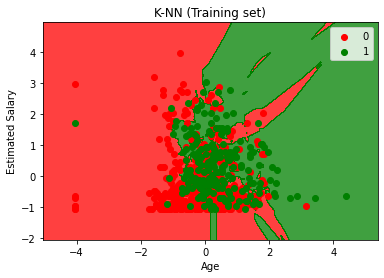

In [46]:
# Visualising the Training set results
from matplotlib.colors import ListedColormap
X_set, y_set = x_train, y_train
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
#Plotting the graph

plt.title('K-NN (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


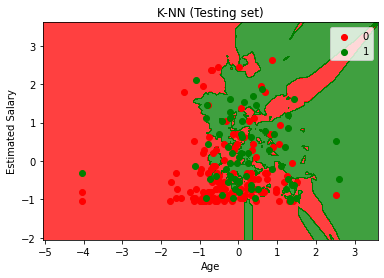

In [47]:
# Visualising the Test Set Results
from matplotlib.colors import ListedColormap
X_set, y_set = x_test, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('red', 'green')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
    
    
#Plotting the graph
plt.title('K-NN (Testing set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()
